In [93]:
#reconstruct phase
import numpy as np
import cmath
import math

size=25

def getMinMax(arr):
    arr.sort()
    minmax = {"min": arr[0], "max": arr[-1]}
    return minmax

number of dots in sine wave 2000


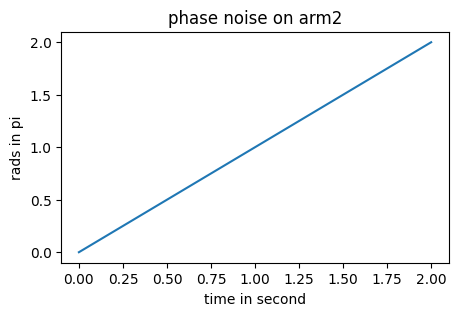

In [104]:
#phase noise on arm2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
amplitude=1*np.pi
time_range=2
period_sine=1
num_period_sine=int(time_range/period_sine)
samples_per_period=1000
time = np.linspace(0, num_period_sine*period_sine, num_period_sine*samples_per_period, endpoint=False)
#phase_noise=amplitude*np.sin(2*np.pi * time/period_sine)
phase_noise=amplitude*time
plt.figure(figsize=(5,3))
plt.plot(time, phase_noise/np.pi)
plt.title("phase noise on arm2")
plt.ylabel("rads in pi",fontsize=10)
plt.xlabel("time in second",fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

print("number of dots in sine wave",num_period_sine*samples_per_period)

phase_measure length 1000


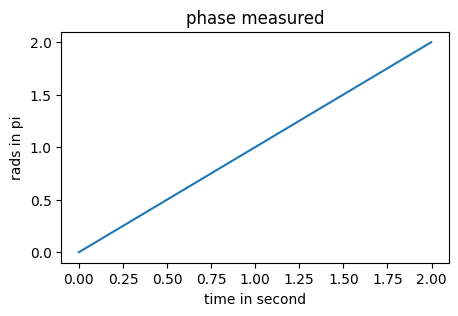

In [105]:

#phase measure
r=1/math.sqrt(2); #cross_coupling_coefficient for the directional coupler (0.707 is 1/sqrt(2)) 
t=math.sqrt(1-r**2); #optical_field_transmission
transfer_directional_coupler=np.matrix([[t,r*1j],[r*1j,t]]) #transfer matrix for directional coupler 3dB coupler
matrixs2=np.dot([1,0],transfer_directional_coupler); #incident on the first arm; the element is 0.5**0.5

l=0  #buffer for count
phase_measure_each = np.empty(len(phase_noise)//2) 
phase_measure = np.empty(len(phase_noise)//2) 
phase_error = np.empty(len(phase_noise)//2) 

#assume we correct phase after each measurement
for i in range(0, len(phase_noise)//2):
    Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]]; #arm2 arm1 ER is infinity
    phase_angle_one=0; 
    phase_angle_two=-math.pi/2;
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two+phase_noise[2*i]))]]);
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    I1_and_I2=[E1**2,E2**2];
    I_diff=I1_and_I2[1]-I1_and_I2[0];
    
    phase_angle_one=0; 
    phase_angle_two=0;
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two+phase_noise[2*i+1]))]]);
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    I1_and_I2=[E1**2,E2**2];
    Q_diff=I1_and_I2[1]-I1_and_I2[0];
    #fix bug of this part:
    if Q_diff==0:
        if I_diff>0:
            phase_measure_each[i]=np.pi/2
        if I_diff<0:
            phase_measure_each[i]=-np.pi/2
    else:    
        phase_measure_each[i]=np.arctan(I_diff/Q_diff)
    if i>=1:
        if phase_measure_each[i]-phase_measure_each[i-1]>math.pi*0.5:
            l=l-1
        if phase_measure_each[i]-phase_measure_each[i-1]<-math.pi*0.5:
            l=l+1
    phase_measure[i]=l*np.pi+phase_measure_each[i]

time = np.linspace(0, num_period_sine*period_sine, num_period_sine*samples_per_period//2, endpoint=False)

plt.figure(figsize=(5,3))
plt.plot(time, phase_measure/np.pi)
plt.title("phase measured")
plt.ylabel("rads in pi",fontsize=10)
plt.xlabel("time in second",fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

minmax = getMinMax(phase_measure_each) 
#print("Minimum element is", minmax["min"])
#print("Maximum element is", minmax["max"])
#print("peak-peak", minmax["max"]-minmax["min"])

print("phase_measure length", len(phase_measure))



number of dots in square wave 2000


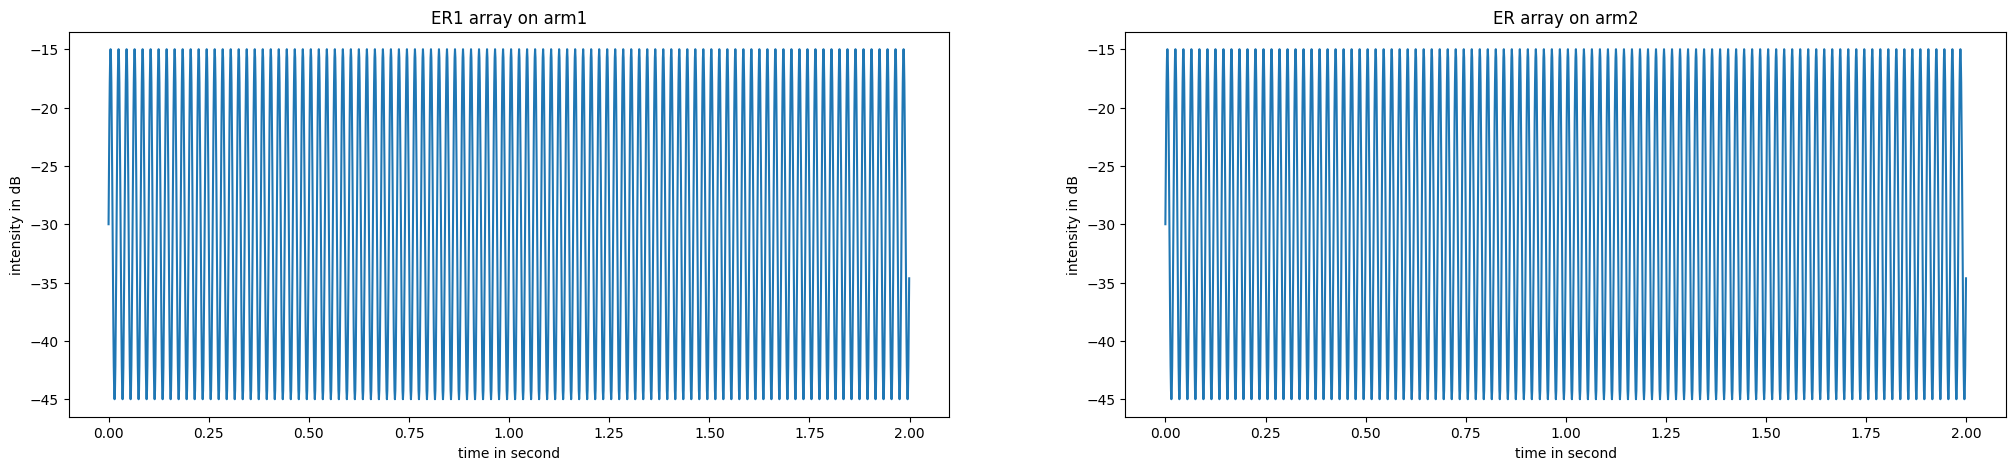

In [106]:
#create ER array
from scipy import signal

frequency_square=100
period_square=1/frequency_square
num_period_square=int(time_range/period_square)
samples_per_period_square=int(samples_per_period/frequency_square)
time2 = np.linspace(0, num_period_square*period_square, num_period_square*samples_per_period_square, endpoint=False)
ER_array_one=15*signal.square((2 * np.pi)* frequency_square*(time2),duty=0.5)-30
#ER_array_two=30*signal.square((2 * np.pi)* frequency_square*(time2),duty=0.5)-35
ER_array_two=15*np.sin((1 * np.pi)* frequency_square* (time2+0.2))-30
#ER_array_two=15*signal.square((2 * np.pi)* frequency_square*(time2+period_square/2),duty=0.5)-30
#plt.figure(figsize=(30,3))
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(25)

axs[0].plot(time2, ER_array_two)
axs[0].set_title("ER1 array on arm1")
axs[0].set(xlabel="time in second", ylabel='intensity in dB')


axs[1].plot(time2, ER_array_two)
axs[1].set_title("ER array on arm2")
axs[1].set(xlabel="time in second", ylabel='intensity in dB')

print("number of dots in square wave",num_period_square*samples_per_period_square)



measuring frequency= 500.0 Hz
phase error
Minimum element is -0.003141592653590042
peak-peak 0.00314157715056651
-0.003141592653590042


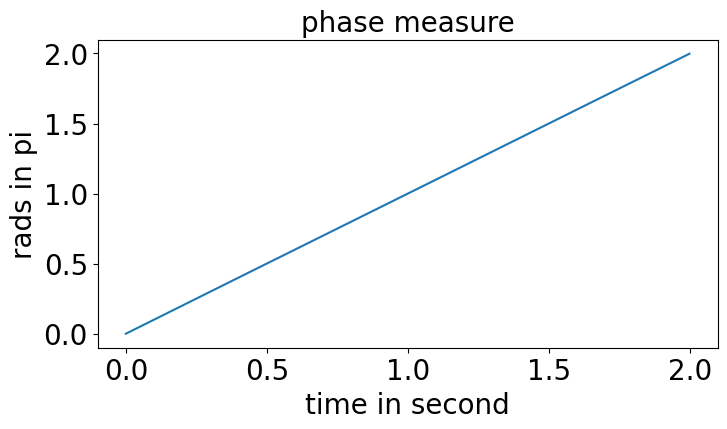

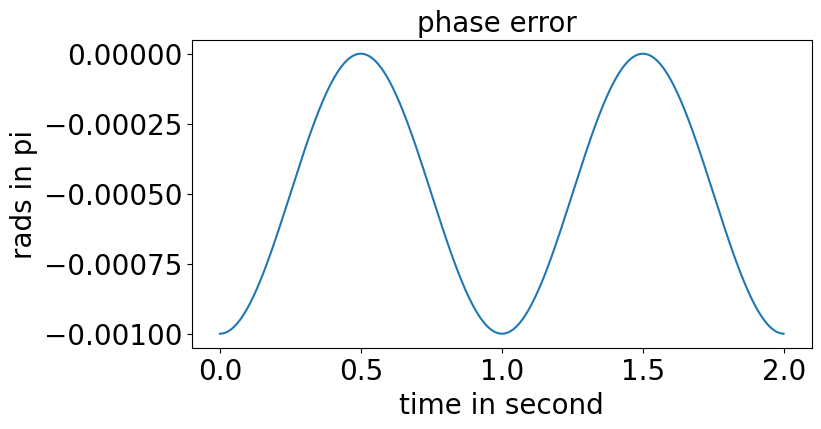

In [107]:
# when consider PER change, do phase measurement, and calculate the error, 

r=1/math.sqrt(2); #cross_coupling_coefficient for the directional coupler (0.707 is 1/sqrt(2)) 
t=math.sqrt(1-r**2); #optical_field_transmission
transfer_directional_coupler=np.matrix([[t,r*1j],[r*1j,t]])
size=20

#phase error when consider ER
import numpy as np
import cmath
import math

phase_measure_each = np.empty(len(phase_noise)//2) 
phase_measure = np.empty(len(phase_noise)//2) 
phase_error = np.empty(len(phase_noise)//2) 

ER_switch=0;

half_pi_error_switch=0; 
if half_pi_error_switch==1:
    half_pi_error=0.1*math.pi
if half_pi_error_switch==0:
    half_pi_error=0

l=0
Ey_arm2_ER=(0.5*(1-10**(ER_array_two/10)))**0.5;
#Ey_arm1_ER=(0.5*(1-10**(ER_array_one/10)))**0.5;
for i in range(0, len(phase_noise)//2):
    #Ey_arm1_Ey_arm2=[(matrixs2[0,0]/(0.5**0.5))*Ey_arm1_ER[i],(matrixs2[0,1]/(0.5**0.5))*Ey_arm2_ER[i]]; #arm2 arm1 ER is infinity    #Ey_arm1_Ey_arm2=[Ey_arm1_ER[i],Ey_arm2_ER[i]]
    phase_angle_one=0; 
    phase_angle_two=-math.pi/2;
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two+phase_noise[2*i]))]]);
    if ER_switch==1:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],(matrixs2[0,1]/(0.5**0.5))*Ey_arm2_ER[2*i]]; #arm2 arm1 ER is infinity
    if ER_switch==0:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]]; #arm2 arm1 ER is infinity
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    I1_and_I2=[E1**2,E2**2];
    I_diff=I1_and_I2[1]-I1_and_I2[0];
    
    phase_angle_one=0; 
    phase_angle_two=0+half_pi_error;
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two+phase_noise[2*i+1]))]]);
    if ER_switch==1:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],(matrixs2[0,1]/(0.5**0.5))*Ey_arm2_ER[2*i+1]]; #arm2 arm1 ER is infinity
    if ER_switch==0:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]]; #arm2 arm1 ER is infinity
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    I1_and_I2=[E1**2,E2**2];
    Q_diff=I1_and_I2[1]-I1_and_I2[0];
    #fix bug of this part:
    if Q_diff==0:
        if I_diff>0:
            phase_measure_each[i]=np.pi/2
        if I_diff<0:
            phase_measure_each[i]=-np.pi/2
    else:    
        phase_measure_each[i]=np.arctan(I_diff/Q_diff)
    if i>=1:
        if phase_measure_each[i]-phase_measure_each[i-1]>math.pi*0.5:
            l=l-1
        if phase_measure_each[i]-phase_measure_each[i-1]<-math.pi*0.5:
            l=l+1
    phase_measure[i]=l*np.pi+phase_measure_each[i]
    phase_error[i]=phase_measure[i]-phase_noise[2*i+1]
    #assume we correct phase after each measurement
    #consider ER
time = np.linspace(0, num_period_sine*period_sine, num_period_sine*samples_per_period//2, endpoint=False)

plt.figure(figsize=(8,4))
plt.plot(time, phase_measure/np.pi)
plt.title("phase measure",fontsize=size)
plt.ylabel("rads in pi",fontsize=size)
plt.xlabel("time in second",fontsize=size)
plt.tick_params(axis='both', which='major', labelsize=size)

plt.figure(figsize=(8,4))
plt.plot(time, phase_error/np.pi)
plt.title("phase error ",fontsize=size)
plt.ylabel("rads in pi",fontsize=size)
plt.xlabel("time in second",fontsize=size)
#plt.ylim(0.31634369632097,0.31634369632098)
plt.tick_params(axis='both', which='major', labelsize=size)

print("measuring frequency=",len(phase_error)/time_range,"Hz")

minmax = getMinMax(phase_error) 
print("phase error")
print("Minimum element is", minmax["min"])
#print("Maximum element is", minmax["max"])
print("peak-peak", minmax["max"]-minmax["min"])
print(phase_error[0])


measuring frequency= 500.0 Hz
phase leftover
peak-peak 1.5862311464331924e-14
-0.03141592653590721


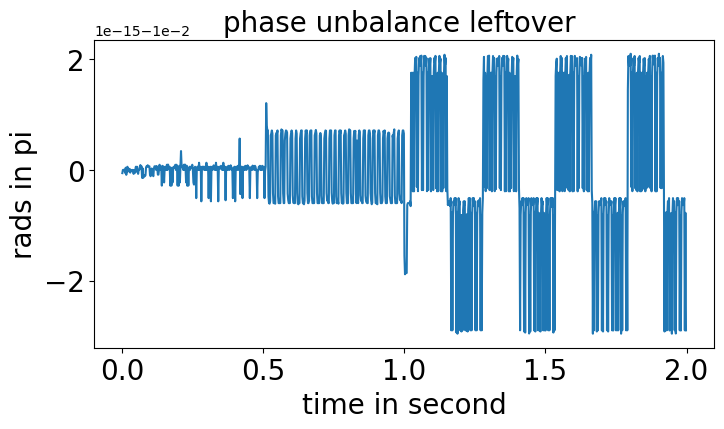

In [103]:
#consider PER change, along with making active correction, calculate the phase error leftover

r=1/math.sqrt(2); #cross_coupling_coefficient for the directional coupler (0.707 is 1/sqrt(2)) 
t=math.sqrt(1-r**2); #optical_field_transmission
transfer_directional_coupler=np.matrix([[t,r*1j],[r*1j,t]])
size=20

#phase error when consider ER
import numpy as np
import cmath
import math

phase_measure_each = np.empty(len(phase_noise)//2) 
phase_leftover= np.empty(len(phase_noise)//2) 
phase_leftover[0]=0
phase_real_each=np.empty(len(phase_noise)) 
#phase_measure = np.empty(len(phase_noise)//2) 
ER_switch=1;

half_pi_error_switch=1; 
if half_pi_error_switch==1:
    half_pi_error=0.1*math.pi
if half_pi_error_switch==0:
    half_pi_error=0

l=0
Ey_arm2_ER=(0.5*(1-10**(ER_array_two/10)))**0.5;
#Ey_arm1_ER=(0.5*(1-10**(ER_array_one/10)))**0.5;
for i in range(0, len(phase_noise)//2):
    phase_angle_one=0; 
    phase_angle_two=-math.pi/2;
    if i==0:
        phase_real_each[2*i]=phase_noise[2*i]
        phase_real_each[2*i+1]=phase_noise[2*i+1]
    elif i>0:
        phase_real_each[2*i]=phase_leftover[i-1]+phase_noise[2*i]-phase_noise[2*(i-1)+1]
        phase_real_each[2*i+1]=phase_leftover[i-1]+phase_noise[2*i+1]-phase_noise[2*(i-1)+1]
    #calculate I
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two+phase_real_each[2*i]))]]);
    if ER_switch==1:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],(matrixs2[0,1]/(0.5**0.5))*Ey_arm2_ER[2*i]]; #arm2 arm1 ER is infinity
    if ER_switch==0:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]]; #arm2 arm1 ER is infinity
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    I1_and_I2=[E1**2,E2**2];
    I_diff=I1_and_I2[1]-I1_and_I2[0];
    #calculate Q
    phase_angle_one=0; 
    phase_angle_two=0+half_pi_error;
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two+phase_real_each[2*i+1]))]]);
    if ER_switch==1:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],(matrixs2[0,1]/(0.5**0.5))*Ey_arm2_ER[2*i+1]]; #arm2 arm1 ER is infinity
    if ER_switch==0:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]]; #arm2 arm1 ER is infinity
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    I1_and_I2=[E1**2,E2**2];
    Q_diff=I1_and_I2[1]-I1_and_I2[0];
    #phase measurement each by arctan I/Q
    if Q_diff==0:
        if I_diff>0:
            phase_measure_each[i]=np.pi/2
        if I_diff<0:
            phase_measure_each[i]=-np.pi/2
    else:    
        phase_measure_each[i]=np.arctan(I_diff/Q_diff)
    phase_leftover[i]=phase_measure_each[i]-phase_real_each[2*i+1]
    #consider ER
#phase_noise_shrink=phase_noise[1::2]
#phase_error=phase_measure-phase_noise_shrink
time = np.linspace(0, num_period_sine*period_sine, num_period_sine*samples_per_period//2, endpoint=False)

plt.figure(figsize=(8,4))
plt.plot(time, phase_leftover/np.pi)
plt.title("phase unbalance leftover ",fontsize=size)
plt.ylabel("rads in pi",fontsize=size)
plt.xlabel("time in second",fontsize=size)
#plt.ylim(0.31634369632097,0.31634369632098)
plt.tick_params(axis='both', which='major', labelsize=size)

print("measuring frequency=",len(phase_error)/time_range,"Hz")

minmax = getMinMax(phase_leftover)
print("phase leftover")
#print("Minimum element is", minmax["min"])
#print("Maximum element is", minmax["max"])
print("peak-peak", minmax["max"]-minmax["min"])
print(phase_leftover[0])


In [71]:
#0.3385568776312688-0.33855687763126857
#100s-2s
(0.39478151626326174-0.39478151626229907)/48*60*60*24

#(0.04008908849918569-0.04008908849917957)/8*60*60*24

#((0.32136849873134565-0.32136849873132123)/48)*60*60*24
#20s-10s


1.7328138923744518e-09

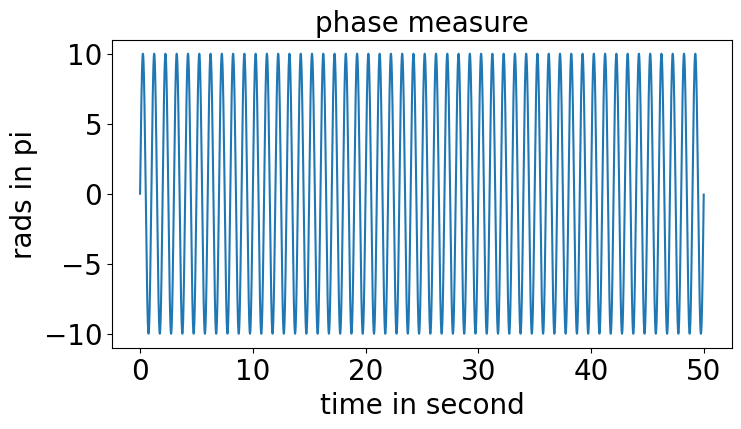

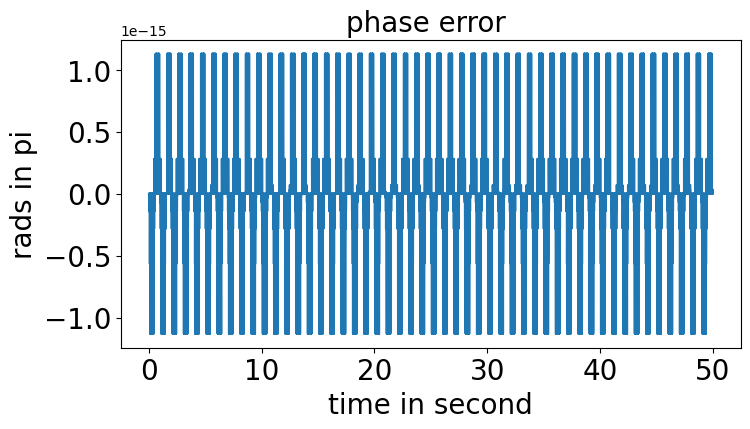

In [52]:
#analytical method to extract phase, without using the transfer matrix
phase_error = np.empty(len(phase_noise)) 
phase_measure_each = np.empty(len(phase_noise)) 
phase_measure = np.empty(len(phase_noise)) 
half_pi_error=0#0.1*math.pi
l=0
#Ey_arm1_ER=(0.5*(1-10**(ER_array_one/10)))**0.5;
for i in range(0, len(phase_noise)):
    #Ey_arm1_Ey_arm2=[(matrixs2[0,0]/(0.5**0.5))*Ey_arm1_ER[i],(matrixs2[0,1]/(0.5**0.5))*Ey_arm2_ER[i]]; #arm2 arm1 ER is infinity
    #Ey_arm1_Ey_arm2=[Ey_arm1_ER[i],Ey_arm2_ER[i]]
    phase_measure_each[i] = np.arctan(np.sin(phase_noise[i])/np.sin(phase_noise[i]+np.pi/2+half_pi_error))
    if i>=1:
        if phase_measure_each[i]-phase_measure_each[i-1]>math.pi*0.5:
            l=l-1
        if phase_measure_each[i]-phase_measure_each[i-1]<-math.pi*0.5:
            l=l+1
    phase_measure[i]=l*np.pi+phase_measure_each[i]

phase_error=phase_measure-phase_noise
time = np.linspace(0, num_period_sine*period_sine, num_period_sine*samples_per_period, endpoint=False)

plt.figure(figsize=(8,4))
plt.plot(time, phase_measure/np.pi)
plt.title("phase measure",fontsize=size)
plt.ylabel("rads in pi",fontsize=size)
plt.xlabel("time in second",fontsize=size)
plt.tick_params(axis='both', which='major', labelsize=size)

plt.figure(figsize=(8,4))
plt.plot(time, phase_error/np.pi)
plt.title("phase error ",fontsize=size)
plt.ylabel("rads in pi",fontsize=size)
plt.xlabel("time in second",fontsize=size)
#plt.ylim(0.31634369632097,0.31634369632098)
plt.tick_params(axis='both', which='major', labelsize=size)

In [36]:
#phase error when consider ER, break down, one-time measurement
import numpy as np
import cmath
import math

r=1/math.sqrt(2); #cross_coupling_coefficient for the directional coupler (0.707 is 1/sqrt(2)) 
t=math.sqrt(1-r**2); #optical_field_transmission
transfer_directional_coupler=np.matrix([[t,r*1j],[r*1j,t]])
size=20

phase_measure= np.empty(1)
phase_error= np.empty(1)
phase_noise=0.01*np.pi
half_pi_error=0.2*(math.pi/2)

ER_one=-10000000
ER_two=-40
Ey_arm1_ER=(0.5*(1-10**(ER_one/10)))**0.5;
Ey_arm2_ER=(0.5*(1-10**(ER_two/10)))**0.5;
#matrixs2=np.dot([1,0],transfer_directional_coupler);
Ey_arm1_Ey_arm2=[matrixs2[0,0]/(0.5**0.5)*Ey_arm1_ER,matrixs2[0,1]/(0.5**0.5)*Ey_arm2_ER]; #arm2 arm1 ER is infinity
#Ey_arm1_Ey_arm2=[Ey_arm1_ER,Ey_arm2_ER] this one doesn't work because you neglect the phase information, the above line works
phase_angle_one=0; 
phase_angle_two=-math.pi/2;
phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two+phase_noise))]]);
matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;
E1=abs(matrixs3[0,0]);
E2=abs(matrixs3[0,1]);
I1_and_I2=[E1**2,E2**2];
I_diff=I1_and_I2[1]-I1_and_I2[0];


ER_one=-10000000
ER_two=-16
Ey_arm1_ER=(0.5*(1-10**(ER_one/10)))**0.5;
Ey_arm2_ER=(0.5*(1-10**(ER_two/10)))**0.5;
Ey_arm1_Ey_arm2=[matrixs2[0,0]/(0.5**0.5)*Ey_arm1_ER,matrixs2[0,1]/(0.5**0.5)*Ey_arm2_ER]; #arm2 arm1 ER is infinity
phase_angle_one=0; 
phase_angle_two=0+half_pi_error;
phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two+phase_noise))]]);
matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;
E1=abs(matrixs3[0,0]);
E2=abs(matrixs3[0,1]);
I1_and_I2=[E1**2,E2**2];
Q_diff=I1_and_I2[1]-I1_and_I2[0];

if Q_diff==0:
    if I_diff>0:
        phase_measure=np.pi/2
    if I_diff<0:
        phase_measure=-np.pi/2
# tricky
else:    
    phase_measure=np.arctan(I_diff/Q_diff)
    
phase_error=phase_measure-phase_noise

print("phase noise=",phase_noise)
print("phase measure=",phase_measure)
print('phase error=',phase_error)

phase noise= 0.031415926535897934
phase measure= 0.033797212998119296
phase error= 0.0023812864622213617


In [ ]:
# Aleternative way how can complex no can initialize
# importing "cmath" for complex number operations
import cmath
n=3 
# Initializing complex number
z = 5+n*1j
# Print the parts of Complex No.
print("The real part of complex number is : ", end="")
print(z)
 
print("The imaginary part of complex number is : ", end="")
print(z.imag)

#### 